In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%notebook inline
import seaborn as sns

import nltk
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# Reading file

In [3]:
df = pd.read_csv("spam.csv", encoding="latin-1")

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

drop all columns except the first two as they have lots of missing values

but first lets check what do these columns actually contain

In [7]:
df[~df['Unnamed: 2'].isna()]

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
95,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
281,ham,\Wen u miss someone,the person is definitely special for u..... B...,why to miss them,"just Keep-in-touch\"" gdeve.."""
444,ham,\HEY HEY WERETHE MONKEESPEOPLE SAY WE MONKEYAR...,HOWU DOIN? FOUNDURSELF A JOBYET SAUSAGE?LOVE ...,NaN,NaN
671,spam,SMS. ac sun0819 posts HELLO:\You seem cool,"wanted to say hi. HI!!!\"" Stop? Send STOP to ...",NaN,NaN
710,ham,Height of Confidence: All the Aeronautics prof...,"this wont even start........ Datz confidence..""",NaN,NaN
899,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
1038,ham,"Edison has rightly said, \A fool can ask more ...",GN,GE,"GNT:-)"""
1127,ham,"Height of \Oh shit....!!\"" situation: A guy th...",".;-):-D""",NaN,NaN
1266,ham,\Hey sorry I didntgive ya a a bellearlier hunny,just been in bedbut mite go 2 thepub l8tr if u...,NaN,NaN
1384,ham,"Storming msg: Wen u lift d phne, u say \HELLO\...","bt not his girlfrnd... G o o d n i g h t . . .@""",NaN,NaN


In [8]:
df.drop(df.iloc[:, 2:], axis=1, inplace=True)

In [9]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [11]:
df.groupby("v1").describe()

v2                                                               
     count unique                                                top freq
v1                                                                       
ham   4825   4516                             Sorry, I'll call later   30
spam   747    653  Please call our customer service representativ...    4

In [12]:
df["length"] = df["v2"].apply(len)

In [13]:
df.head()

,v1,v2,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


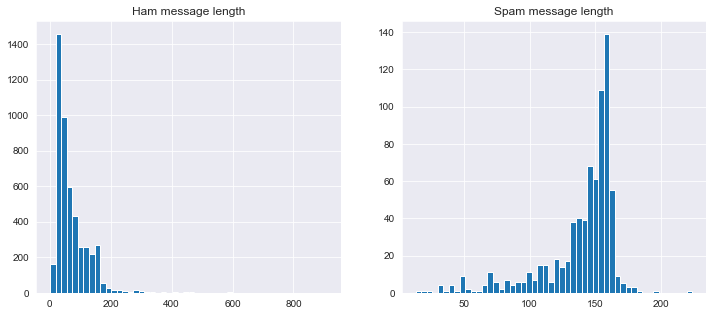

In [14]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(df[df["v1"]=="ham"]['length'], bins=50)
plt.title("Ham message length")

plt.subplot(1,2,2)
plt.hist(df[df["v1"]=="spam"]['length'], bins=50)
plt.title("Spam message length")

plt.show()

spam maessages tend to have higher word count

# Text preproscessing

In [15]:
print(string.punctuation)

sample = "sup! my dude..."
ls = [c for c in sample if c not in string.punctuation] 
print(ls)
ls = ''.join(ls)
ls

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
['s', 'u', 'p', ' ', 'm', 'y', ' ', 'd', 'u', 'd', 'e']


'sup my dude'

In [16]:
from nltk.corpus import stopwords
stopwords.words('english')[0:10] 

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [17]:
clean = [word for word in ls.split() if word not in stopwords.words('english')]

In [18]:
clean

['sup', 'dude']

In [19]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [20]:
df['v2'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: v2, dtype: object

# vectorization

In [21]:
bagofwords_transformer = CountVectorizer(analyzer=text_process).fit(df['v2'])

print(len(bagofwords_transformer.vocabulary_))

11304


In [22]:
message5 = df['v2'][4]
bow5 = bagofwords_transformer.transform([message5])
print(bow5)
print(bow5.shape)

  (0, 2897)	1
  (0, 4698)	1
  (0, 6038)	1
  (0, 6786)	1
  (0, 7740)	1
  (0, 10320)	1
  (0, 10337)	1
  (0, 10681)	1
(1, 11304)


message 5 contains 8 words and every word appears once

In [23]:
df_bow = bagofwords_transformer.transform(df['v2'])

In [24]:
df_bow.shape

(5572, 11304)

# TF-IDF

TF-IDF is a weight/statistical measure used to evaluate how important a word is to a document in a collection

TF: Term Frequency, which measures how frequently a term occurs in a document. 
    
It is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length as a way of normalization 

IDF: Inverse Document Frequency, which measures how important a term is. 

While computing TF, all terms are considered equally important. However it is known that certain terms, such as (is, of, etc), may appear a lot of times but have little importance. 

Thus, we have to weigh down the frequent terms while scale up the rare ones.

In [25]:
tfidf_transformer = TfidfTransformer().fit(df_bow)

In [26]:
tfidf5 = tfidf_transformer.transform(bow5)
print(tfidf5)

  (0, 10681)	0.40173624834617694
  (0, 10337)	0.3539244191334122
  (0, 10320)	0.27032457509133806
  (0, 7740)	0.4455603976230396
  (0, 6786)	0.3539244191334122
  (0, 6038)	0.2425048093840929
  (0, 4698)	0.31029495356660663
  (0, 2897)	0.40173624834617694


In [27]:
print(tfidf_transformer.idf_[bagofwords_transformer.vocabulary_['u']])
print(tfidf_transformer.idf_[bagofwords_transformer.vocabulary_['b']])
print(tfidf_transformer.idf_[bagofwords_transformer.vocabulary_['cool']])
print(tfidf_transformer.idf_[bagofwords_transformer.vocabulary_['project']])
print(tfidf_transformer.idf_[bagofwords_transformer.vocabulary_['awesome']])

3.288863056423095
5.693863154845211
6.293484277394333
6.917638586467326
7.227793514771165


In [28]:
df_tfidf = tfidf_transformer.transform(df_bow)
print(df_tfidf.shape)

(5572, 11304)


# Training Model

In [29]:
models = {
    "                   Logistic_Regression": LogisticRegression(),
    "        K-Nearest Neighbors_Classifier": KNeighborsClassifier(n_neighbors=9),
    "                Naive_Bayes_Classifier": MultinomialNB(),
    "              Random_Forest_Classifier": RandomForestClassifier()
}

In [30]:
pipelines={}

In [31]:
X_train, X_test, y_train, y_test = train_test_split(df['v2'], df['v1'], test_size=0.3, random_state=101)

In [32]:
for name, model in models.items():
    
    print(name+"_pipeline created!")
    model_pipeline = Pipeline([
        
    ('bagofwords', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    (name, model),# train on TF-IDF vectors w/ classifier
        
    ])
    
    model_pipeline.fit(X_train, y_train)
    print(name+"_pipeline trained!")
    
    pipelines.update({name: model_pipeline})

                   Logistic_Regression_pipeline created!
                   Logistic_Regression_pipeline trained!
        K-Nearest Neighbors_Classifier_pipeline created!
        K-Nearest Neighbors_Classifier_pipeline trained!
                Naive_Bayes_Classifier_pipeline created!
                Naive_Bayes_Classifier_pipeline trained!
              Random_Forest_Classifier_pipeline created!
              Random_Forest_Classifier_pipeline trained!


# Evaluation

In [33]:
def evalModel(name, model):
    print(name)
    print("\nConfusion Matrix")
    predictions = model.predict(X_test)
    print(confusion_matrix(y_test,predictions))
    print("\nClassifiation Report")
    print(classification_report(y_test,predictions))
    print("==="*40)

In [34]:
for name, model in pipelines.items():
    print(name)
    print("--------------------"*3)
    print("Testing Accuracy: {:.5f}".format(model.score(X_test, y_test)))
    print("Training Accuracy: {:.5f}".format(model.score(X_train, y_train)))
    print("--------------------"*3)
    print('\n')    

                   Logistic_Regression
------------------------------------------------------------
Testing Accuracy: 0.94797
Training Accuracy: 0.95590
------------------------------------------------------------


        K-Nearest Neighbors_Classifier
------------------------------------------------------------
Testing Accuracy: 0.94677
Training Accuracy: 0.94615
------------------------------------------------------------


                Naive_Bayes_Classifier
------------------------------------------------------------
Testing Accuracy: 0.96471
Training Accuracy: 0.97641
------------------------------------------------------------


              Random_Forest_Classifier
------------------------------------------------------------
Testing Accuracy: 0.96770
Training Accuracy: 0.99564
------------------------------------------------------------




In [35]:
for name, model in pipelines.items():
    evalModel(name, model)
    

                   Logistic_Regression

Confusion Matrix
[[1460    4]
 [  83  125]]

Classifiation Report
              precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1464
        spam       0.97      0.60      0.74       208

    accuracy                           0.95      1672
   macro avg       0.96      0.80      0.86      1672
weighted avg       0.95      0.95      0.94      1672

        K-Nearest Neighbors_Classifier

Confusion Matrix
[[1461    3]
 [  86  122]]

Classifiation Report
              precision    recall  f1-score   support

         ham       0.94      1.00      0.97      1464
        spam       0.98      0.59      0.73       208

    accuracy                           0.95      1672
   macro avg       0.96      0.79      0.85      1672
weighted avg       0.95      0.95      0.94      1672

                Naive_Bayes_Classifier

Confusion Matrix
[[1464    0]
 [  59  149]]

Classifiation Report
              precision    r

Let's make a quick predicition

In [36]:
clf  = pipelines['        K-Nearest Neighbors_Classifier']

In [37]:
clf.predict(["hi how are you"])

array(['ham'], dtype=object)